In [25]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.data.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


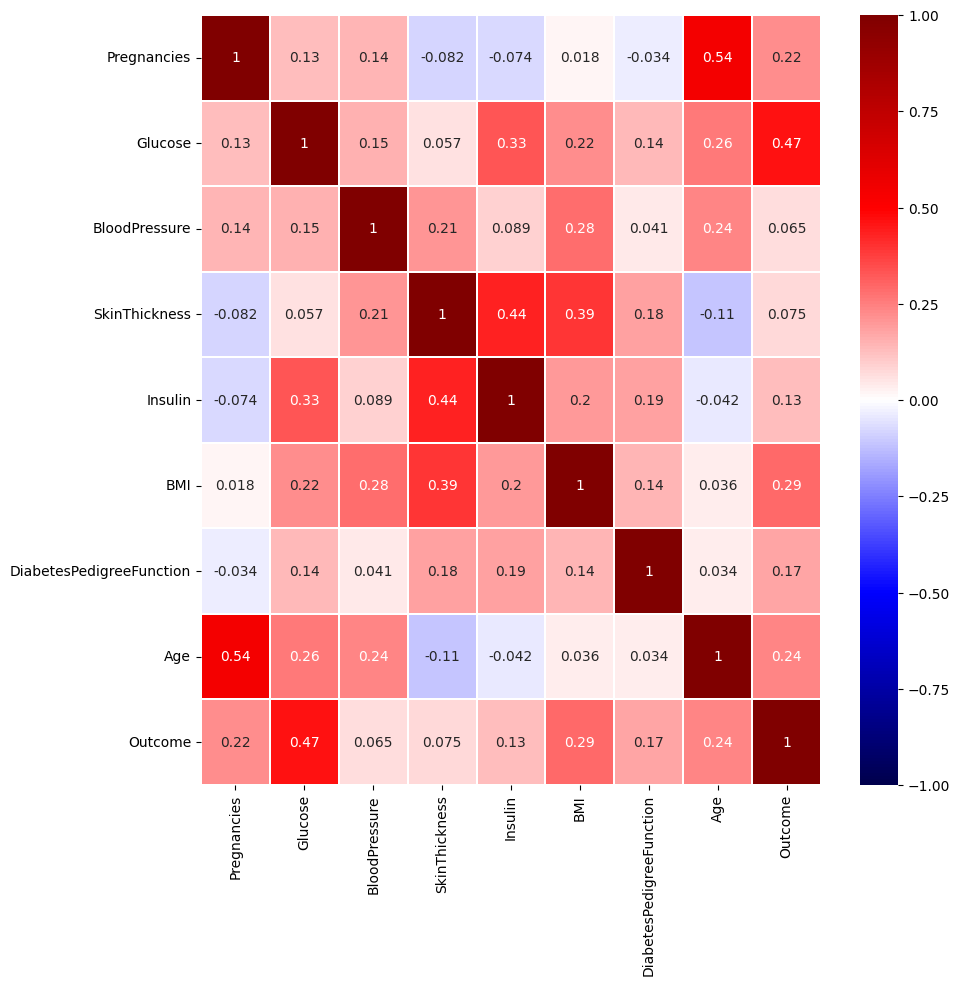

In [3]:
plt.figure(figsize=(10,10))
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

0번째 행값에 대해 당뇨유무 에측하시요.

In [4]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]].values

In [5]:
x_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y_data

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [7]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform( x_data )
x = torch.FloatTensor( x_dataN )
y = torch.FloatTensor( y_data )

In [8]:
x.shape
feature_len = x.shape[1]
feature_len

8

In [9]:
model = Sequential()
model.add_module('nn1', Linear(feature_len,1)) # w:[8,1] b:[1]
model.add_module('sig1', Sigmoid()) # 활성함수
loss_fn = torch.nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.1)

In [10]:
hist=[]
for epoch in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Sigmoid(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print('cost=',cost.item())
    hist.append(cost.item())

cost= 0.6709789633750916
cost= 0.6583239436149597
cost= 0.6540589332580566
cost= 0.6477454304695129
cost= 0.6399670243263245
cost= 0.6329060196876526
cost= 0.6272891163825989
cost= 0.6223459243774414
cost= 0.6171860098838806
cost= 0.6117064952850342
cost= 0.6063905954360962
cost= 0.6016854047775269
cost= 0.5976106524467468
cost= 0.593844473361969
cost= 0.5900961756706238
cost= 0.5863496661186218
cost= 0.582792341709137
cost= 0.5795837044715881
cost= 0.5766991972923279
cost= 0.5739710927009583
cost= 0.5712564587593079
cost= 0.5685518980026245
cost= 0.5659539103507996
cost= 0.5635334253311157
cost= 0.5612604022026062
cost= 0.5590415596961975
cost= 0.5568141341209412
cost= 0.554591953754425
cost= 0.5524320602416992
cost= 0.5503646731376648
cost= 0.5483638644218445
cost= 0.5463795065879822
cost= 0.5443899035453796
cost= 0.5424177050590515
cost= 0.5404983162879944
cost= 0.5386410355567932
cost= 0.5368242263793945
cost= 0.5350245237350464
cost= 0.5332426428794861
cost= 0.5314993262290955
cos

cost= 0.47099313139915466
cost= 0.47099316120147705
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099316120147705
cost= 0.47099316120147705
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.4709930419921875
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.4709930419921875
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.4709930419921875
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.4709930419921875
cost= 0.4709930717945099
cost= 0.47099313139915466
cost= 0.4709930717945099
cost= 0.4709930717945099
c

cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.4709930419921875
cost= 0.4709930419921875
cost= 0.4709930419921875
cost= 0.4709930419921875
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313139915466
cost= 0.47099313

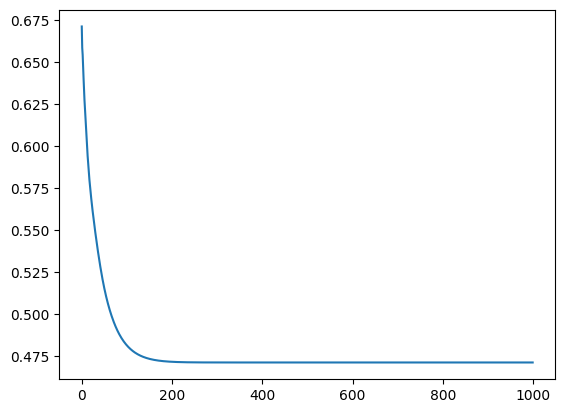

In [11]:
plt.plot(hist)
plt.show()

In [12]:
p = model.forward(x[0].reshape(1,feature_len))
d = ( p > 0.5 ) + 0
d

tensor([[1]])

In [13]:
pred = (model.forward(x) > 0.5) + 0
pred

tensor([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],

In [14]:
(y.numpy() == pred.numpy()).mean() # 정확도

0.7825520833333334

### 검증

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score

In [21]:
con_mat = confusion_matrix(y.numpy(), pred.numpy())
con_mat

array([[445,  55],
       [112, 156]], dtype=int64)

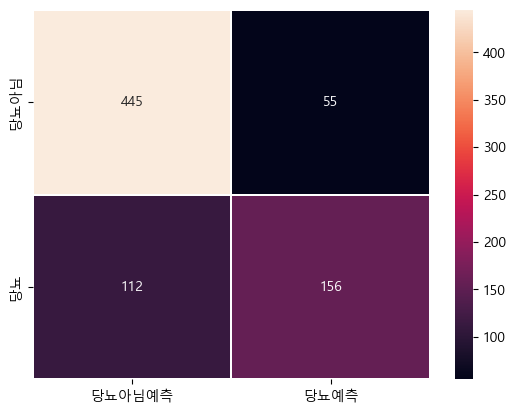

In [29]:
sb.heatmap( con_mat, annot=True, fmt='d', linewidths=0.2, 
           yticklabels=['당뇨아님','당뇨'], xticklabels=['당뇨아님예측','당뇨예측'] )
plt.show()

#### 정확도

In [34]:
accuracy_score(y.numpy(), pred.numpy())

0.7825520833333334

In [36]:
y.numpy()

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [37]:
pred.numpy()

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [32]:
f1_score(y.numpy(), pred.numpy())

0.651356993736952